## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [1]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [2]:
n_class_0,n_class_1
import matplotlib.pyplot as plt


In [3]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

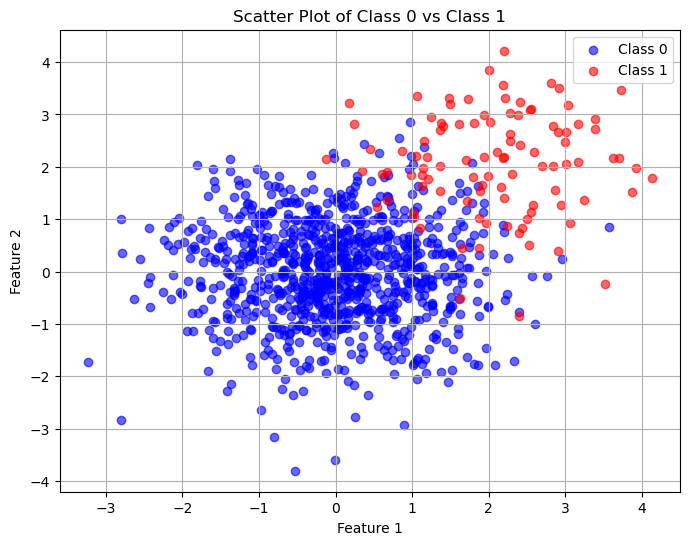

In [5]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [7]:
df.describe()

,feature_1,feature_2,target
count,1000.000000,1000.000000,1000.00000
mean,0.183458,0.185367,0.10000
std,1.178761,1.149907,0.30015
min,-3.231055,-3.801378,0.00000
25%,-0.598262,-0.566582,0.00000
50%,0.103814,0.161365,0.00000
75%,0.953581,0.847383,0.00000
max,4.125817,4.216788,1.00000


In [7]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [8]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [9]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [10]:
df_minority_upsampled.shape

(900, 3)

In [11]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [13]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [14]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [15]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

0    900
1    100
Name: target, dtype: int64


In [16]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [ ]:
from sklearn.utils import resample
df_majority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )